In [1]:
import sys
import os

sys.path.append("../src/")

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F

plt.rcParams["savefig.bbox"] = "tight"

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(
            np.asarray(img), interpolation="none", cmap="gray", vmin=0, vmax=1
        )
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [3]:
#base_path: str = "/data2/projects/DigiStrudMed_sklein/sample-case/Scans-QuPathProjekt-RCC(1Case)-10062021/"
# base_path: str = "/media/sciobiome/DATA/sklein_tmp/Scans-QuPathProjekt-RCC-1Case-10062021/"
base_path:str = "/data2/projects/DigiStrudMed_sklein/sample-case/Scans-fuer-QupathProjekt-RCC-3Faelle-10062021/"

case: str = "RCC-TA-011.001.023~M" # 1.8 gb
#case: str = "RCC-TA-070.016~H" # 3.5 gb
#case: str = "RCC-TA-070.019~E" # 27 gb


image = base_path + case + ".svs"

# JSON array like this [{type: ..., id: ..., geometry: ..., properties: ...}, {...}, ...]
geojson_array: str = base_path + case + ".svs.json"

annos_of_interest: list[str] = [
    "Tissue",
    "Tumor_vital",
    "diffuse tumor growth in soft tissue",
    "Angioinvasion",
    "Tumor_necrosis",
    "Tumor_regression",
]


In [5]:
import openslide
import numpy as np

import sys
import os

sys.path.append("../src/")
from geojson2mask import geojson_to_mask
from helpers import show

svs = openslide.open_slide(image)
width, height = svs.dimensions


masks = {}
masks[case] = {}
masks[case] = geojson_to_mask(geojson_array, annos_of_interest, (height, width))

TIFFReadDirectory: Warning, Unknown field with tag 45744 (0xb2b0) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45745 (0xb2b1) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45746 (0xb2b2) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 46000 (0xb3b0) encountered.
TIFFReadDirectoryCheckOrder: Warning, Invalid TIFF directory; tags are not sorted in ascending order.
TIFFReadDirectory: Warning, Unknown field with tag 45744 (0xb2b0) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45745 (0xb2b1) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45746 (0xb2b2) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 46000 (0xb3b0) encountered.
TIFFReadDirectoryCheckOrder: Warning, Invalid TIFF directory; tags are not sorted in ascending order.
TIFFReadDirectory: Warning, Unknown field with tag 45744 (0xb2b0) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45745 (0xb2b1) encountered.
TIFFRe

In [ ]:
from pyvips import Image
from matplotlib import pyplot as plt

patch_size = (512,512)
zstd_level = 3

In [ ]:
import numpy as np
import pyvips
import matplotlib.pyplot as plt

# Convert the NumPy array to a pyvips Image
img = pyvips.Image.new_from_array(
    masks[case]["Tumor_vital"],
    interpretation='b-w',
)


In [ ]:
import pyvips
slide = pyvips.Image.openslideload(image, level=0)

print(f'''
    {slide.get_fields()}
    {slide.get('openslide.level-count')}
    {slide.get('openslide.level[0].downsample')}
    {slide.get('openslide.level[1].downsample')}
    {slide.get('slide-associated-images')}
    ''')



In [ ]:
sys.path.append("../src/")

from PyvipsWrapper import PyVipsReader

reader = PyVipsReader(image)

In [ ]:
from cucim import CuImage

img = CuImage(image)

start_pos = np.array((0,0))
patch_size = np.array((512,512))
mask_level = 3

level3= img.read_region(location=start_pos, level=mask_level, size=patch_size, num_workers=10)

mask_ratio = int(img.resolutions["level_downsamples"][mask_level])


level0= img.read_region(location=start_pos*mask_ratio, level=0, size=patch_size*mask_ratio, num_workers=10)


In [ ]:
from monai.data import MaskedPatchWSIDataset, DataLoader
from TiffMaskWSIDataset import BinMaskedPatchWSIDataset

data = [{"image": image, }]

ds = MaskedPatchWSIDataset(data, mask_level=3, patch_size=40000, reader="cuCIM")
print(f"len(ds) = {len(ds)}")
dl = DataLoader(ds, batch_size=1, num_workers=10)
batch = next(iter(dl))  # 1 min 1 sec
batch["image"].shape

In [ ]:
show(batch["image"][0]) # 1 min 33 sec

In [5]:
from monai.data import MaskedPatchWSIDataset, DataLoader
sys.path.append("../src/")
from PyvipsWrapper import numpy2pyramid
from TiffMaskWSIDataset import BinMaskedPatchWSIDataset
from cucim import CuImage
from monai.transforms import CropForegroundd

# dims = CuImage(image).shape
numpy2pyramid(masks[case]["Tissue"], f"{case}-Tissue.tiff", tiff_tilesize=512)
print("writing to file done")

data = [{"image": image, "Tissue": f"{case}-Tissue.tiff"}]

transform = CropForegroundd(keys=annos_of_interest+["image"], source_key="Tissue", allow_missing_keys=True,)

ds = BinMaskedPatchWSIDataset(data, mask_level=3, patch_size=40000, reader="cuCIM", tissue_label="Tissue", masks=annos_of_interest,) #transform=transform, )
print("dataset created")

dl = DataLoader(ds, batch_size=1, num_workers=0)

In the future `np.bool` will be defined as the corresponding NumPy scalar.  (This may have returned Python scalars in past versions.
In the future `np.bool` will be defined as the corresponding NumPy scalar.  (This may have returned Python scalars in past versions.
In the future `np.bool` will be defined as the corresponding NumPy scalar.  (This may have returned Python scalars in past versions.
In the future `np.bool` will be defined as the corresponding NumPy scalar.  (This may have returned Python scalars in past versions.


2023-02-07 11:09:18,290 - VIPS: vips__open_image_write: O_TMPFILE not available
2023-02-07 11:09:18,291 - VIPS: vips__open_image_write: simple open
2023-02-07 11:09:18,292 - VIPS: vips__open_image_write: O_TMPFILE not available
2023-02-07 11:09:18,293 - VIPS: vips__open_image_write: simple open
2023-02-07 11:09:18,293 - VIPS: vips__open_image_write: O_TMPFILE not available
2023-02-07 11:09:18,294 - VIPS: vips__open_image_write: simple open
2023-02-07 11:09:18,294 - VIPS: vips__open_image_write: O_TMPFILE not available
2023-02-07 11:09:18,295 - VIPS: vips__open_image_write: simple open
2023-02-07 11:09:18,295 - VIPS: vips__open_image_write: O_TMPFILE not available
2023-02-07 11:09:18,296 - VIPS: vips__open_image_write: simple open
2023-02-07 11:09:18,296 - VIPS: vips__open_image_write: O_TMPFILE not available
2023-02-07 11:09:18,297 - VIPS: vips__open_image_write: simple open
2023-02-07 11:09:18,297 - VIPS: vips__open_image_write: O_TMPFILE not available
2023-02-07 11:09:18,297 - VIPS: 

TIFFReadDirectory: Warning, Unknown field with tag 45744 (0xb2b0) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45745 (0xb2b1) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45746 (0xb2b2) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 46000 (0xb3b0) encountered.
TIFFReadDirectoryCheckOrder: Warning, Invalid TIFF directory; tags are not sorted in ascending order.


dataset created


In [17]:
for value in batch.values():
    print(value.shape)
    print(value)

torch.Size([1, 40000, 40000])
tensor([[[0, 0, 0,  ..., 1, 1, 1],
         [0, 0, 0,  ..., 1, 1, 1],
         [0, 0, 0,  ..., 1, 1, 1],
         ...,
         [0, 0, 0,  ..., 1, 1, 1],
         [0, 0, 0,  ..., 1, 1, 1],
         [0, 0, 0,  ..., 1, 1, 1]]], dtype=torch.uint8)
torch.Size([1, 3, 40000, 40000])
tensor([[[[224, 224, 223,  ..., 255, 255, 255],
          [225, 224, 223,  ..., 255, 255, 255],
          [225, 225, 224,  ..., 255, 255, 255],
          ...,
          [201, 203, 197,  ..., 183, 178, 172],
          [202, 205, 199,  ..., 184, 178, 172],
          [205, 207, 203,  ..., 185, 180, 174]],

         [[222, 221, 218,  ..., 255, 255, 255],
          [222, 220, 218,  ..., 255, 255, 255],
          [221, 220, 219,  ..., 255, 255, 255],
          ...,
          [187, 188, 181,  ..., 170, 162, 157],
          [188, 190, 183,  ..., 174, 165, 158],
          [190, 191, 188,  ..., 173, 165, 159]],

         [[221, 222, 224,  ..., 255, 255, 255],
          [223, 221, 220,  ..., 25

In [18]:
image

'/data2/projects/DigiStrudMed_sklein/sample-case/Scans-fuer-QupathProjekt-RCC-3Faelle-10062021/RCC-TA-011.001.023~M.svs'

In [22]:
sys.path.append("../src/")
from PyvipsWrapper import numpy2pyramid, PyVipsReader

img = PyVipsReader(image)

2023-02-07 12:19:05,621 - VIPS: Unknown field with tag 45744 (0xb2b0) encountered
2023-02-07 12:19:05,622 - VIPS: Unknown field with tag 45745 (0xb2b1) encountered
2023-02-07 12:19:05,624 - VIPS: Unknown field with tag 45746 (0xb2b2) encountered
2023-02-07 12:19:05,625 - VIPS: Unknown field with tag 46000 (0xb3b0) encountered
2023-02-07 12:19:05,628 - VIPS: Invalid TIFF directory; tags are not sorted in ascending order
2023-02-07 12:19:05,631 - VIPS: Unknown field with tag 45744 (0xb2b0) encountered
2023-02-07 12:19:05,631 - VIPS: Unknown field with tag 45745 (0xb2b1) encountered
2023-02-07 12:19:05,632 - VIPS: Unknown field with tag 45746 (0xb2b2) encountered
2023-02-07 12:19:05,632 - VIPS: Unknown field with tag 46000 (0xb3b0) encountered
2023-02-07 12:19:05,634 - VIPS: Invalid TIFF directory; tags are not sorted in ascending order
2023-02-07 12:19:05,635 - VIPS: Unknown field with tag 45744 (0xb2b0) encountered
2023-02-07 12:19:05,635 - VIPS: Unknown field with tag 45745 (0xb2b1) en

In [54]:
cu_img.associated_image("thumbnail").shape

[768, 779, 3]

In [58]:
mask = PyVipsReader("/home/sklein/renal-cancer-dl/notebooks/RCC-TA-011.001.023~M-Tissue.tiff")

In [7]:
import pyvips
import sys
sys.path.append("../src/")
from PyvipsWrapper import numpy2pyramid, PyVipsReader

numpy2pyramid(masks[case]["Tissue"], f"{case}-Tissue.tiff", tiff_tilesize=512)

2023-02-07 16:17:19,312 - VIPS: vips__open_image_write: O_TMPFILE not available
2023-02-07 16:17:19,317 - VIPS: vips__open_image_write: simple open
2023-02-07 16:17:19,318 - VIPS: vips__open_image_write: O_TMPFILE not available
2023-02-07 16:17:19,319 - VIPS: vips__open_image_write: simple open
2023-02-07 16:17:19,320 - VIPS: vips__open_image_write: O_TMPFILE not available
2023-02-07 16:17:19,321 - VIPS: vips__open_image_write: simple open
2023-02-07 16:17:19,322 - VIPS: vips__open_image_write: O_TMPFILE not available
2023-02-07 16:17:19,323 - VIPS: vips__open_image_write: simple open
2023-02-07 16:17:19,324 - VIPS: vips__open_image_write: O_TMPFILE not available
2023-02-07 16:17:19,325 - VIPS: vips__open_image_write: simple open
2023-02-07 16:17:19,325 - VIPS: vips__open_image_write: O_TMPFILE not available
2023-02-07 16:17:19,326 - VIPS: vips__open_image_write: simple open
2023-02-07 16:17:19,327 - VIPS: vips__open_image_write: O_TMPFILE not available
2023-02-07 16:17:19,327 - VIPS: 

In [101]:
f"{case}-Tissue.tiff"

'RCC-TA-011.001.023~M-Tissue.tiff'

In [8]:
mask = pyvips.Image.tiffload(f"{case}-Tissue.tiff")

for page_num in range(mask.get_n_pages()):
    temp = pyvips.Image.tiffload(mask.filename, page=page_num)
    print(temp.width, temp.height)

100105 98661
50052 49330
25026 24665
12513 12332
6256 6166
3128 3083
1564 1541
782 770
391 385


In [14]:
import pyvips

img = pyvips.Image.tiffload(image)

for page_num in range(img.get_n_pages()):
    temp = pyvips.Image.tiffload(img.filename, page=page_num)
    print(temp.width, temp.height)

100105 98661
779 768
25026 24665
6256 6166
1564 1541
391 385


In [10]:
from cucim import CuImage
import pyvips

img = CuImage(image)
mask = pyvips.Image.tiffload("/home/sklein/renal-cancer-dl/notebooks/RCC-TA-011.001.023~M-Tissue.tiff")

img.shape

TIFFReadDirectory: Warning, Unknown field with tag 45744 (0xb2b0) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45745 (0xb2b1) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45746 (0xb2b2) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 46000 (0xb3b0) encountered.
TIFFReadDirectoryCheckOrder: Warning, Invalid TIFF directory; tags are not sorted in ascending order.


[98661, 100105, 3]

In [15]:
print(mask.get_fields())
print(mask.height, mask.width)

['width', 'height', 'bands', 'format', 'coding', 'interpretation', 'xoffset', 'yoffset', 'xres', 'yres', 'filename', 'vips-loader', 'n-pages', 'resolution-unit', 'orientation']
98661 100105


In [11]:
image2mask = {}
mask2image = {}
dimensions = {}

for img_page in range(img.get_n_pages()):
    tmp_img = pyvips.Image.tiffload(img.filename, page=img_page)
    for mask_page in range(mask.get_n_pages()):
        tmp_mask = pyvips.Image.tiffload(mask.filename, page=mask_page)

        if tmp_mask.width == tmp_img.width and tmp_mask.height == tmp_img.height:
            print(img_page)
            print(mask_page)
            #print(tmp_mask.width, tmp_mask.height)

            image2mask[img_page] = mask_page
            mask2image[mask_page] = img_page
            dimensions[img_page] = np.array((tmp_mask.width, tmp_mask.height))

image_level_to_page = {idx: value for idx, value in enumerate(image2mask.values())}
mask_level_to_page = {idx: value for idx, value in enumerate(mask2image.values())}

print(image2mask)
print(mask2image)
print(dimensions)
print(image_level_to_page)
print(mask_level_to_page)

NameError: name 'img' is not defined

In [30]:
import pyvips
img = pyvips.Image.black(10, 10, bands=1)
img = img.numpy()
img

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [31]:
from monai.data import MaskedPatchWSIDataset, DataLoader
import traceback


sys.path.append("../src/")
# from PyvipsWrapper import numpy2pyramid
from MaskDataset import PatchMaskDataset

# from monai.transforms import CropForegroundd

# dims = CuImage(image).shape
# numpy2pyramid(masks[case]["Tissue"], f"{case}-Tissue.tiff", tiff_tilesize=512)
# print("writing to file done")

data = [
    {
        "image": image,
        "Tissue": f"{case}-Tissue.tiff",
        "surv_time": 3,
        "Tissue-geojson": image + ".json",
    }
]

# transform = CropForegroundd(keys=annos_of_interest+["image"], source_key="Tissue", allow_missing_keys=True,)
try:
    ds = PatchMaskDataset(
    data,
    patch_size=512,
    foreground_key="Tissue",
    image_key="image",
    json_key="Tissue-geojson",
    label_key="surv_time",
    keys=annos_of_interest,
)
    print("dataset created")

    dl = DataLoader(
    ds,
    batch_size=10,
    num_workers=0,
    shuffle=True,
    )   

except:
    traceback.print_exc()
    traceback.print_stack()



dataset created


In [32]:
batch = next(iter(dl))


Loading image and masks 9.059906005859375e-06
Loading done 0.002748727798461914
Starting patch extraction for masks 0.002773284912109375
Patch extraction for masks done 0.004144430160522461
Starting patch extraction for image 0.004159212112426758
Starting call to read_region 0.0041730403900146484
Size of x_fit_size 512 and y_fit_size 512
Size of patch_size 512
Size of image patch [512, 512, 3] 0.07306337356567383
Patch extraction for image done 0.07308292388916016
Starting conversion to tensor 0.07315659523010254
Converting to tensor done 0.13751864433288574
Starting padding 0.137556791305542
Padding done 0.137589693069458
Return_sample keys dict_keys(['image', 'Tissue', 'Tumor_vital', 'diffuse tumor growth in soft tissue', 'Angioinvasion', 'Tumor_necrosis', 'Tumor_regression', 'data', 'surv_time']) 0.13952255249023438
Loading image and masks 1.0967254638671875e-05
Loading done 0.003314971923828125
Starting patch extraction for masks 0.0033538341522216797
Patch extraction for masks don

TIFFReadDirectory: Warning, Unknown field with tag 45744 (0xb2b0) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45745 (0xb2b1) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45746 (0xb2b2) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 46000 (0xb3b0) encountered.
TIFFReadDirectoryCheckOrder: Warning, Invalid TIFF directory; tags are not sorted in ascending order.
TIFFReadDirectory: Warning, Unknown field with tag 45744 (0xb2b0) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45745 (0xb2b1) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45746 (0xb2b2) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 46000 (0xb3b0) encountered.
TIFFReadDirectoryCheckOrder: Warning, Invalid TIFF directory; tags are not sorted in ascending order.


Size of image patch [512, 512, 3] 0.07757091522216797
Patch extraction for image done 0.07762742042541504
Starting conversion to tensor 0.07768726348876953
Converting to tensor done 0.14086365699768066
Starting padding 0.14090347290039062
Padding done 0.1409461498260498
Return_sample keys dict_keys(['image', 'Tissue', 'Tumor_vital', 'diffuse tumor growth in soft tissue', 'Angioinvasion', 'Tumor_necrosis', 'Tumor_regression', 'data', 'surv_time']) 0.14275026321411133
Loading image and masks 1.1444091796875e-05
Loading done 0.0029113292694091797
Starting patch extraction for masks 0.002946138381958008
Patch extraction for masks done 0.005093812942504883
Starting patch extraction for image 0.0051136016845703125
Starting call to read_region 0.005135536193847656
Size of x_fit_size 512 and y_fit_size 512
Size of patch_size 512
Size of image patch [512, 512, 3] 0.07282638549804688
Patch extraction for image done 0.0728464126586914
Starting conversion to tensor 0.07290315628051758


TIFFReadDirectory: Warning, Unknown field with tag 45744 (0xb2b0) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45745 (0xb2b1) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45746 (0xb2b2) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 46000 (0xb3b0) encountered.
TIFFReadDirectoryCheckOrder: Warning, Invalid TIFF directory; tags are not sorted in ascending order.
TIFFReadDirectory: Warning, Unknown field with tag 45744 (0xb2b0) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45745 (0xb2b1) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45746 (0xb2b2) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 46000 (0xb3b0) encountered.
TIFFReadDirectoryCheckOrder: Warning, Invalid TIFF directory; tags are not sorted in ascending order.


Converting to tensor done 0.13813042640686035
Starting padding 0.138228178024292
Padding done 0.13826298713684082
Return_sample keys dict_keys(['image', 'Tissue', 'Tumor_vital', 'diffuse tumor growth in soft tissue', 'Angioinvasion', 'Tumor_necrosis', 'Tumor_regression', 'data', 'surv_time']) 0.14008021354675293
Loading image and masks 1.1444091796875e-05
Loading done 0.003224611282348633
Starting patch extraction for masks 0.003265380859375
Patch extraction for masks done 0.005542278289794922
Starting patch extraction for image 0.005553722381591797
Starting call to read_region 0.005566835403442383
Size of x_fit_size 512 and y_fit_size 512
Size of patch_size 512
Size of image patch [512, 512, 3] 0.07808613777160645
Patch extraction for image done 0.07811093330383301
Starting conversion to tensor 0.0781712532043457
Converting to tensor done 0.14180898666381836
Starting padding 0.14183616638183594
Padding done 0.1418619155883789
Return_sample keys dict_keys(['image', 'Tissue', 'Tumor_vit

TIFFReadDirectory: Warning, Unknown field with tag 45744 (0xb2b0) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45745 (0xb2b1) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45746 (0xb2b2) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 46000 (0xb3b0) encountered.
TIFFReadDirectoryCheckOrder: Warning, Invalid TIFF directory; tags are not sorted in ascending order.
TIFFReadDirectory: Warning, Unknown field with tag 45744 (0xb2b0) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45745 (0xb2b1) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45746 (0xb2b2) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 46000 (0xb3b0) encountered.
TIFFReadDirectoryCheckOrder: Warning, Invalid TIFF directory; tags are not sorted in ascending order.


Size of image patch [512, 512, 3] 0.07485222816467285
Patch extraction for image done 0.0749213695526123
Starting conversion to tensor 0.07498025894165039
Converting to tensor done 0.13971805572509766
Starting padding 0.13974738121032715
Padding done 0.13977265357971191
Return_sample keys dict_keys(['image', 'Tissue', 'Tumor_vital', 'diffuse tumor growth in soft tissue', 'Angioinvasion', 'Tumor_necrosis', 'Tumor_regression', 'data', 'surv_time']) 0.1414642333984375
Loading image and masks 8.821487426757812e-06
Loading done 0.0021686553955078125
Starting patch extraction for masks 0.002197265625
Patch extraction for masks done 0.0037970542907714844
Starting patch extraction for image 0.003811359405517578
Starting call to read_region 0.0038275718688964844
Size of x_fit_size 512 and y_fit_size 512
Size of patch_size 512
Size of image patch [512, 512, 3] 0.07532191276550293
Patch extraction for image done 0.07534623146057129
Starting conversion to tensor 0.0754096508026123
Converting to te

TIFFReadDirectory: Warning, Unknown field with tag 45744 (0xb2b0) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45745 (0xb2b1) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45746 (0xb2b2) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 46000 (0xb3b0) encountered.
TIFFReadDirectoryCheckOrder: Warning, Invalid TIFF directory; tags are not sorted in ascending order.
TIFFReadDirectory: Warning, Unknown field with tag 45744 (0xb2b0) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45745 (0xb2b1) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45746 (0xb2b2) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 46000 (0xb3b0) encountered.
TIFFReadDirectoryCheckOrder: Warning, Invalid TIFF directory; tags are not sorted in ascending order.


Size of image patch [512, 512, 3] 0.06934618949890137
Patch extraction for image done 0.06943464279174805
Starting conversion to tensor 0.06949567794799805
Converting to tensor done 0.137115478515625
Starting padding 0.13713836669921875
Padding done 0.13715767860412598
Return_sample keys dict_keys(['image', 'Tissue', 'Tumor_vital', 'diffuse tumor growth in soft tissue', 'Angioinvasion', 'Tumor_necrosis', 'Tumor_regression', 'data', 'surv_time']) 0.13881802558898926
Loading image and masks 7.867813110351562e-06
Loading done 0.001995563507080078
Starting patch extraction for masks 0.0020220279693603516
Patch extraction for masks done 0.0034410953521728516
Starting patch extraction for image 0.003454923629760742
Starting call to read_region 0.0034689903259277344
Size of x_fit_size 512 and y_fit_size 512
Size of patch_size 512
Size of image patch [512, 512, 3] 0.07440495491027832
Patch extraction for image done 0.07442688941955566
Starting conversion to tensor 0.074493408203125


TIFFReadDirectory: Warning, Unknown field with tag 45744 (0xb2b0) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45745 (0xb2b1) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45746 (0xb2b2) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 46000 (0xb3b0) encountered.
TIFFReadDirectoryCheckOrder: Warning, Invalid TIFF directory; tags are not sorted in ascending order.
TIFFReadDirectory: Warning, Unknown field with tag 45744 (0xb2b0) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45745 (0xb2b1) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 45746 (0xb2b2) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 46000 (0xb3b0) encountered.
TIFFReadDirectoryCheckOrder: Warning, Invalid TIFF directory; tags are not sorted in ascending order.


Converting to tensor done 0.13584589958190918
Starting padding 0.13593792915344238
Padding done 0.13596773147583008
Return_sample keys dict_keys(['image', 'Tissue', 'Tumor_vital', 'diffuse tumor growth in soft tissue', 'Angioinvasion', 'Tumor_necrosis', 'Tumor_regression', 'data', 'surv_time']) 0.1376960277557373
Loading image and masks 8.58306884765625e-06
Loading done 0.0024499893188476562
Starting patch extraction for masks 0.0024831295013427734
Patch extraction for masks done 0.00397801399230957
Starting patch extraction for image 0.003988504409790039
Starting call to read_region 0.004000425338745117
Size of x_fit_size 512 and y_fit_size 512
Size of patch_size 512
Size of image patch [512, 512, 3] 0.07500863075256348
Patch extraction for image done 0.07503533363342285
Starting conversion to tensor 0.07509565353393555
Converting to tensor done 0.14659976959228516
Starting padding 0.1466236114501953
Padding done 0.14664483070373535
Return_sample keys dict_keys(['image', 'Tissue', 'Tu

In [7]:
batch.keys()

dict_keys(['data', 'surv_time', 'location', 'dataset_index', 'case_id', 'stain_id'])

In [7]:
batch['data'][0].shape

torch.Size([9, 512, 512])

tensor([29367, 27544])
(tensor([  0,   1,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
         80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
         94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
        108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
        122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
        136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
        150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
        164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
        178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
        192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
        206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,
        220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 234,
        235], dtype=torch.uint8), tensor

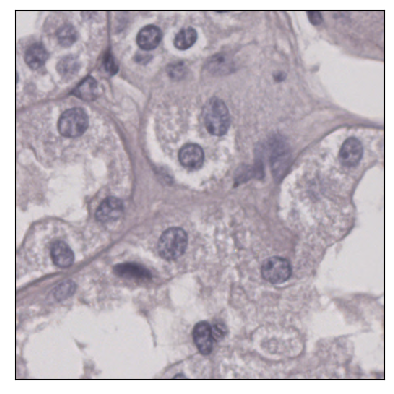

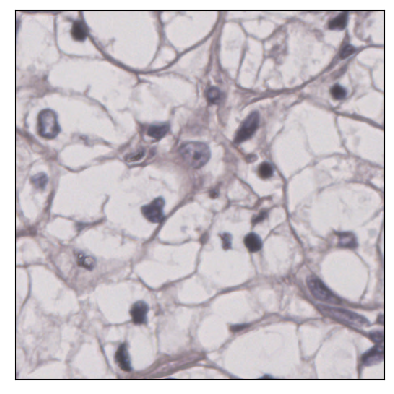

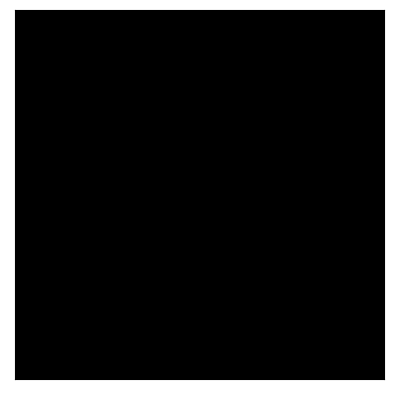

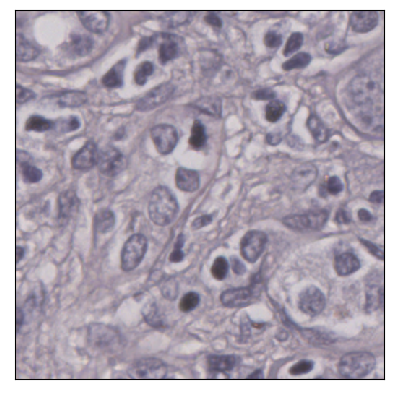

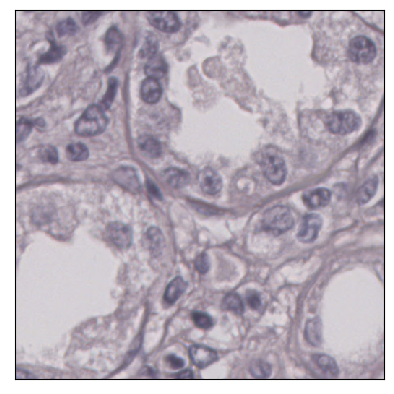

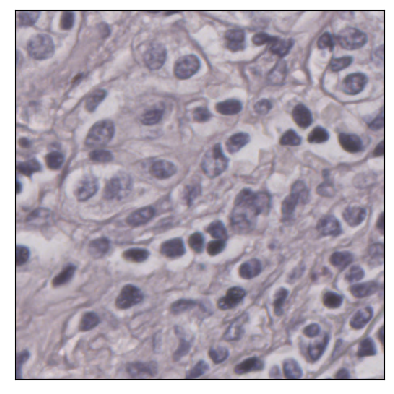

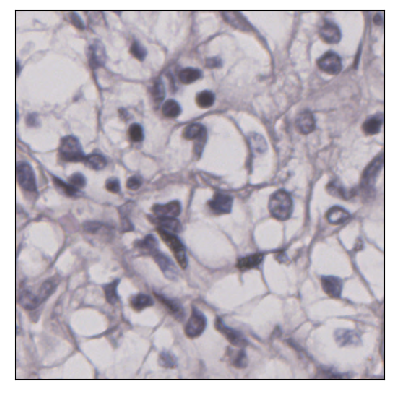

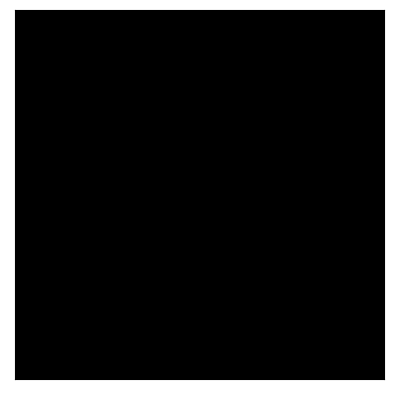

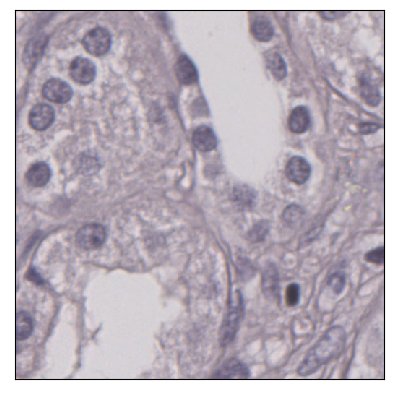

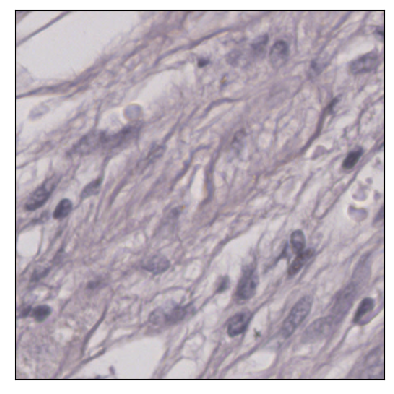

In [34]:
from torchvision.utils import make_grid, draw_segmentation_masks

mask_pics = []
img_pics = []
seg_pics = []

for pic, loc in zip(batch['data'], batch["location"]):
    # print(pic[0:3].shape)
    # print(pic[3:4].shape)
    # img_pics.append(pic[0:3])
    #mask_pics.append(pic[3:4].bool().uint8())
    # seg_pics.append(draw_segmentation_masks(pic[0:3], masks=pic[3:4].bool(), colors=["red"], alpha=.6))
    print(loc)
    show(pic[0:3])
    print(pic.unique(return_counts=True))
    # show(pic[3:4])
    # show(draw_segmentation_masks(pic[0:3], masks=pic[3:4].bool(), colors=["red"], alpha=.6))


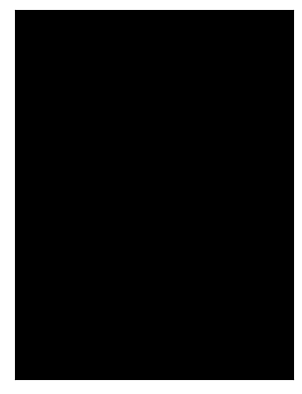

In [12]:
seg_pics = make_grid(seg_pics, nrow=3, padding=10)
show(seg_pics)

In [ ]:
%%script false --no-raise-error

import time
import pyvips
import torch

VIPS_FORMAT_TO_DTYPE: dict[str, torch.dtype] = {
    'uchar': torch.uint8,
    'char': torch.int8,
    # 'ushort': torch.uint16,
    'short': torch.int16,
    # 'uint': torch.uint32,
    'int': torch.int32,
    'float': torch.float32,
    'double': torch.float64,
    'complex': torch.complex64,
    'dpcomplex': torch.complex128,
}

VIPS_FORMAT_TO_DTYPE_NP: dict[str, type] = {
    'uchar': np.uint8,
    'char': np.int8,
    'ushort': np.uint16,
    'short': np.int16,
    'uint': np.uint32,
    'int': np.int32,
    'float': np.float32,
    'double': np.float64,
    'complex': np.complex64,
    'dpcomplex': np.complex128,
}

img = pyvips.Image.tiffload(image)#.crop(0,0, 40000, 40000)
# print("start benchmark")
# start = time.time()
# arr1 = torch.as_tensor(np.ndarray(buffer=img.write_to_memory(),
#             dtype=VIPS_FORMAT_TO_DTYPE_NP[img.format], # type: ignore
#             shape=[img.height, img.width, img.bands]))
# print(time.time() - start)

# start = time.time()
# arr2 =  torch.frombuffer(img.write_to_memory(), dtype=VIPS_FORMAT_TO_DTYPE[img.format]).reshape(img.width, img.height ,img.bands)
# print(time.time() - start)

start = time.time()
arr3 = torch.as_tensor(img.numpy(np.uint8))
print(time.time() - start)

# SLOW AS FUCK, .tensor does copy the data
# start = time.time()
# arr4 = torch.tensor(img.write_to_memory(), dtype=VIPS_FORMAT_TO_DTYPE[img.format]).reshape(img.width, img.height ,img.bands)
# print(time.time() - start)

# print(f"arr1 vs arr2 {torch.equal(arr1, arr2)}")
# print(f"arr1 vs arr3 {torch.equal(arr1, arr3)}")
# print(f"arr1 vs arr4 {torch.equal(arr1, arr4)}")

